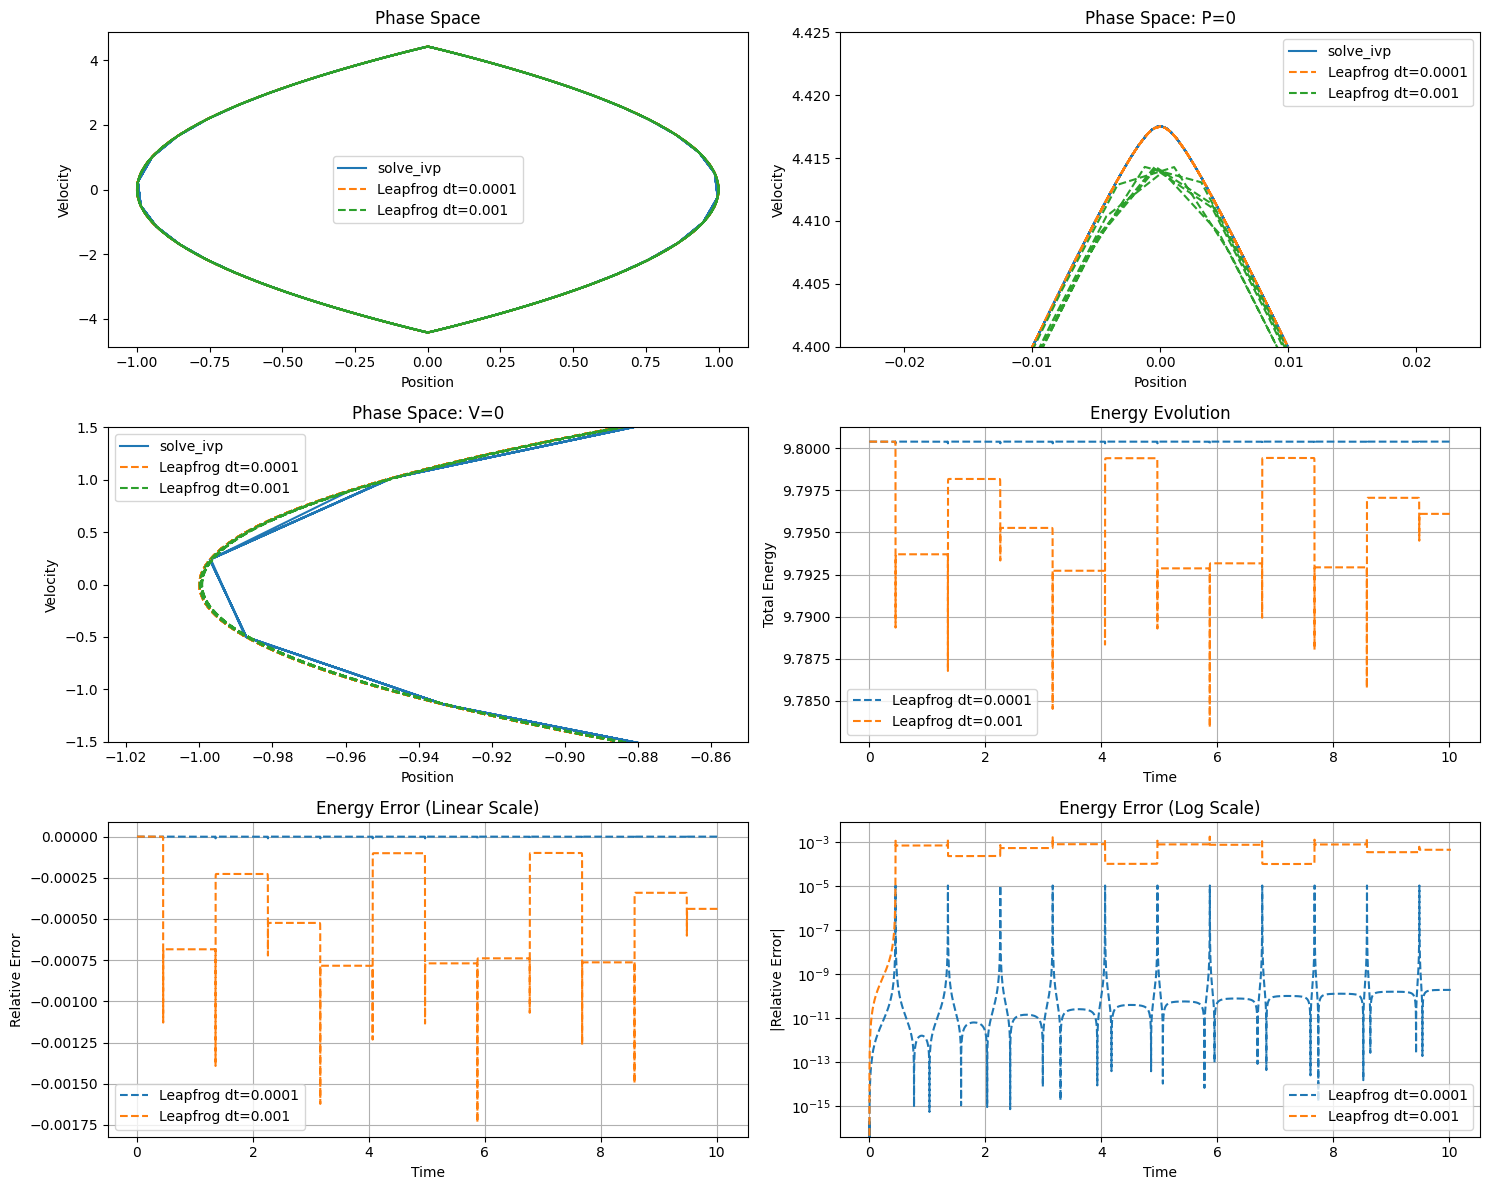


For dt = 0.0001:
Max relative error: 1.04e-05
Mean relative error: 8.11e-09
Standard deviation: 2.05e-07

For dt = 0.001:
Max relative error: 1.74e-03
Mean relative error: 4.78e-04
Standard deviation: 2.79e-04


In [1]:
import numpy as np
from scipy import constants as const
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

orbits = 5
x0 = 1
v0 = 0
x_s = 0.001
T = 2 * np.pi * np.sqrt(x0/const.g)  # Time Orbit

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def total_energy(x, v, x_s):
    potential = -const.g / np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))
    kinetic = 0.5 * v**2
    return kinetic + potential

def system(t, y, x_s):
    x, v = y
    return [v, force(x, x_s)]

def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    
    x = np.zeros(h)
    v = np.zeros(h)
    energy = np.zeros(h)
    x[0] = x0
    v[0] = v0
    energy[0] = total_energy(x[0], v[0], x_s)
    
    for i in range(h-1):
        if x[i] * x[i+1] < 0:
            v[i+1] = -(x[i] + x[i+1])/(x[i+1]-x[i]) * dt * 0.5 * force(x[i], x_s)
            x[i+1] = x[i] + dt * v[i+1]
            v[i+1] = (x[i+1]+x[i])/(x[i+1]-x[i]) * dt * 0.5 * force(x[i], x_s)
        else:
            v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
            x[i+1] = x[i] + dt * v[i+1]
            v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s) 

        energy[i+1] = total_energy(x[i+1], v[i+1], x_s)

    return t, x, v, energy

def ivp_solution(x0, v0, x_s, T, orbits):
    t_span = (0, orbits * T)
    y0 = [x0, v0]
    sol = solve_ivp(system, t_span, y0, args=(x_s,), method='RK45', rtol=1e-10, atol=1e-10)
    return sol.t, sol.y[0], sol.y[1]

# Compute solutions
t_ivp, x_ivp, v_ivp = ivp_solution(x0, v0, x_s, T, orbits)
stepsizes = [1e-4, 1e-3]
leapfrog_results = [numerical_solution(x0, v0, x_s, dt, T, orbits) for dt in stepsizes]

# Plotting
fig = plt.figure(figsize=(15, 12))

# Phase Space
plt.subplot(3,2,1)
plt.plot(x_ivp, v_ivp, label='solve_ivp')
for i, (_, x, v, _) in enumerate(leapfrog_results):
    plt.plot(x, v, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space')
plt.legend()

# Phase Space: P=0
plt.subplot(3,2,2)
plt.plot(x_ivp, v_ivp, label='solve_ivp')
for i, (_, x, v, _) in enumerate(leapfrog_results):
    plt.plot(x, v, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.xlim(-0.025,0.025)
plt.ylim(4.4,4.425)
plt.title('Phase Space: P=0')
plt.legend()

# Phase Space: V=0
plt.subplot(3,2,3)
plt.plot(x_ivp, v_ivp, label='solve_ivp')
for i, (_, x, v, _) in enumerate(leapfrog_results):
    plt.plot(x, v, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.xlim(-1.025,-0.85)
plt.ylim(-1.5,1.5)
plt.title('Phase Space: V=0')
plt.legend()

# Raw Energy Evolution
plt.subplot(3,2,4)
for i, (t, _, _, energy) in enumerate(leapfrog_results):
    plt.plot(t, energy, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.title('Energy Evolution')
plt.grid(True)
plt.legend()

# Relative Error (linear scale)
plt.subplot(3,2,5)
for i, (t, _, _, energy) in enumerate(leapfrog_results):
    relative_error = (energy - energy[0]) / np.abs(energy[0])
    plt.plot(t, relative_error, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Relative Error')
plt.title('Energy Error (Linear Scale)')
plt.grid(True)
plt.legend()

# Relative Error (log scale)
plt.subplot(3,2,6)
for i, (t, _, _, energy) in enumerate(leapfrog_results):
    relative_error = np.abs((energy - energy[0]) / energy[0])
    plt.semilogy(t, relative_error, label=f'Leapfrog dt={stepsizes[i]}', linestyle='--')
plt.xlabel('Time')
plt.ylabel('|Relative Error|')
plt.title('Energy Error (Log Scale)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print some statistics about the energy conservation
for i, (_, _, _, energy) in enumerate(leapfrog_results):
    relative_error = (energy - energy[0]) / energy[0]
    print(f"\nFor dt = {stepsizes[i]}:")
    print(f"Max relative error: {np.max(np.abs(relative_error)):.2e}")
    print(f"Mean relative error: {np.mean(np.abs(relative_error)):.2e}")
    print(f"Standard deviation: {np.std(relative_error):.2e}")

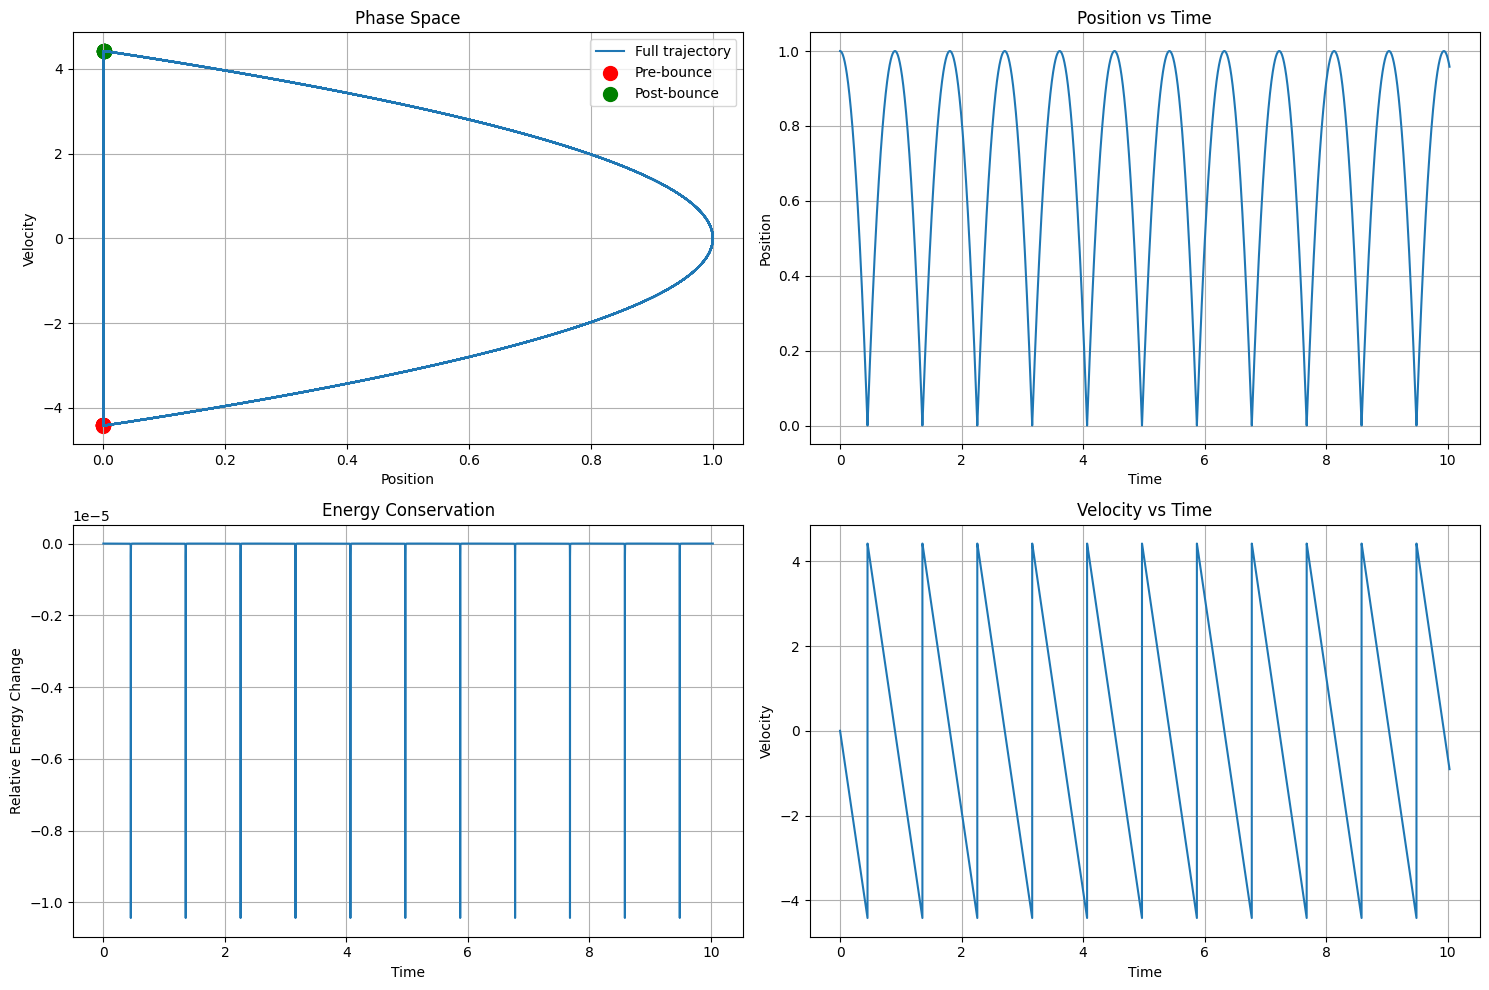


Simulation Summary:
Total time steps: 100321
Number of bounces: 11

First bounce details:
Time: 0.4518
Pre-bounce:  x = 5.903037e-07, v = -4.417506e+00
Post-bounce: x = 4.411603e-04, v = 4.417506e+00
Energy conservation at bounce: 4.98e-05


In [6]:
import numpy as np
from scipy import constants as const
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
orbits = 5
x0 = 1
v0 = 0
x_s = 0.001
T = 2 * np.pi * np.sqrt(x0/const.g)

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def total_energy(x, v, x_s):
    potential = -const.g / np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))
    kinetic = 0.5 * v**2
    return kinetic + potential

def numerical_solution_fixed(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    
    x = np.zeros(h)
    v = np.zeros(h)
    energy = np.zeros(h)
    bounce_info = []
    
    x[0] = x0
    v[0] = v0
    energy[0] = total_energy(x[0], v[0], x_s)
    
    for i in range(h-1):
        # Standard leapfrog step first
        v_half = v[i] + 0.5 * dt * force(x[i], x_s)
        x_next = x[i] + dt * v_half
        
        # Check for bounce
        if x[i] * x_next < 0:
            # Store pre-bounce info
            bounce_info.append({
                'step': i,
                'time': t[i],
                'x_pre': x[i],
                'v_pre': v_half
            })
            
            # First correction term
            v_new = -(x[i] + x_next)/(x_next-x[i]) * v_half
            x_next = x[i] + dt * v_new
            
            # Second correction term - using the corrected position
            v_half = (x_next+x[i])/(x_next-x[i]) * v_new
            
            bounce_info[-1].update({
                'x_post': x_next,
                'v_post': v_half
            })
        
        # Complete the leapfrog step
        v_next = v_half + 0.5 * dt * force(x_next, x_s)
        
        x[i+1] = x_next
        v[i+1] = v_next
        energy[i+1] = total_energy(x[i+1], v[i+1], x_s)
    
    return t, x, v, energy, bounce_info

# Run simulation
dt = 1e-4
results = numerical_solution_fixed(x0, v0, x_s, dt, T, orbits)
t, x, v, energy, bounce_info = results

# Plotting
plt.figure(figsize=(15, 10))

# Phase space
plt.subplot(2,2,1)
plt.plot(x, v, label='Full trajectory')
if bounce_info:
    pre_bounce_x = [b['x_pre'] for b in bounce_info]
    pre_bounce_v = [b['v_pre'] for b in bounce_info]
    post_bounce_x = [b['x_post'] for b in bounce_info]
    post_bounce_v = [b['v_post'] for b in bounce_info]
    plt.scatter(pre_bounce_x, pre_bounce_v, color='red', label='Pre-bounce', s=100)
    plt.scatter(post_bounce_x, post_bounce_v, color='green', label='Post-bounce', s=100)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space')
plt.legend()
plt.grid(True)

# Position vs time
plt.subplot(2,2,2)
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position vs Time')
plt.grid(True)

# Energy conservation
plt.subplot(2,2,3)
plt.plot(t, (energy - energy[0])/energy[0])
plt.xlabel('Time')
plt.ylabel('Relative Energy Change')
plt.title('Energy Conservation')
plt.grid(True)

# Velocity vs time
plt.subplot(2,2,4)
plt.plot(t, v)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity vs Time')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print statistics
print("\nSimulation Summary:")
print(f"Total time steps: {len(t)}")
print(f"Number of bounces: {len(bounce_info)}")
if bounce_info:
    print("\nFirst bounce details:")
    b = bounce_info[0]
    print(f"Time: {b['time']:.4f}")
    print(f"Pre-bounce:  x = {b['x_pre']:.6e}, v = {b['v_pre']:.6e}")
    print(f"Post-bounce: x = {b['x_post']:.6e}, v = {b['v_post']:.6e}")
    print(f"Energy conservation at bounce: {(total_energy(b['x_post'], b['v_post'], x_s) - energy[0])/energy[0]:.2e}")